# Regresja

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn import  metrics

Rozważmy zbiór Boston

In [3]:
boston = datasets.load_boston()
# print description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# get the data
x = boston.data
y = boston.target

Wykonajmy regresję:

- klasyczną  

i wyznaczmy dla niej optymalny stopień wielomianu. 

In [5]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))

In [6]:
# evaluate each model in turn
results = []
names = []
#scoring = 'neg_mean_absolute_error'
scoring = 'r2'
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold)#, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.350741 (0.379709)
PR2: -7.066574 (13.631604)
PR3: -61804387.826943 (113445019.731482)
PR4: -1278431.944894 (2546777.187748)
PR5: -1692552.537380 (3380530.329519)
PR6: -4412449.956014 (8819100.677912)


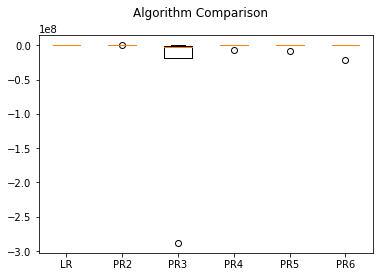

In [7]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

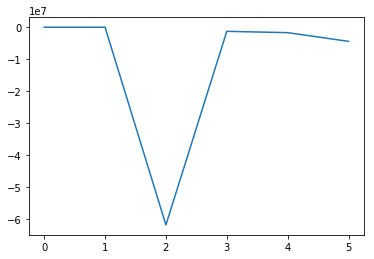

In [8]:
plt.plot(np.mean(results,1))
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=5,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge()).get_params().keys()
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 1}

# Zadanie 2
Wykonajmy regresję:

- regresję grzbietową (Ridge)
- regresję Lasso
- Elastic Net

i wyznaczmy dla nich optymalny stopień wielomianu. 